<a href="https://colab.research.google.com/github/CodingAlex12/proyecto_IA/blob/main/Comparativa_A*_Beam_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://mkt.up.edu.mx/hs-fs/hubfs/universidad-panamericana-admisiones-logo.jpg?width=1000&name=universidad-panamericana-admisiones-logo.jpg)

# <p align="center">***Inteligencia Artificial***
---
# <p align="center">***Segundo Proyecto***
# <p align="center">23/Abril/2024
# <br>
# <p align="center"> PROFESOR:
# <p align="center"> Ari Yair Barrera Animas
# <br>
# <p align="center"> Elaborado por:<br>
## <p align="center"> Alejandro Villafaña Anaya, Diego Hernández Ortiz, Wladimir Cantu Gejde
<br><br><br>


#   Problema del Viajero


In [1]:
# Librerías a importar para el funcionamiento de la aplicación
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time

In [2]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.0 MB/s eta 0:00:00


### Implementación A*

In [3]:
def aStart(start_node,target_node):
    def heuristic(graph, current_node, remaining_nodes, target_node):
        # Heurística: calcular la distancia mínima desde el nodo actual al nodo objetivo
        return nx.shortest_path_length(graph, current_node, target_node, weight='weight')

    def astar_tsp(graph, start_node, target_node):
        # Inicialización
        remaining_nodes = set(graph.nodes()) - {start_node}
        frontier = [(0, start_node, remaining_nodes, [start_node])]
        heapq.heapify(frontier)
        visited = set()

        while frontier:
            # Seleccionar el nodo de la frontera con el menor costo total estimado
            total_cost, current_node, remaining_nodes, path = heapq.heappop(frontier)

            # Verificar si se ha llegado al nodo objetivo
            if current_node == target_node:
                return total_cost, path

            # Expandir el nodo actual
            for neighbor in graph.neighbors(current_node):
                if neighbor not in visited:
                    new_remaining = remaining_nodes - {neighbor}
                    new_path = path + [neighbor]
                    new_cost = total_cost + graph[current_node][neighbor]['weight'] + heuristic(graph, neighbor, new_remaining, target_node)
                    heapq.heappush(frontier, (new_cost, neighbor, new_remaining, new_path))
            visited.add(current_node)

        return float('inf'), None  # Si no se encuentra una solución

    # Crear el grafo con los nodos y aristas
    GR = nx.Graph()
    GR.add_nodes_from(['Veracruz', 'Acapulco', 'Puebla', 'CDMX', 'Morelia', 'San Luis Potosi', 'Tampico', 'Culiacan', 'Los Cabos', 'Monterrey', 'Merida', 'Guadalajara', 'Tijuana', 'Cancun', 'Queretaro', 'Zacatecas', 'Oaxaca', 'Chiapas', 'Chihuahua', 'Durango'])

    # Agregar las aristas con sus pesos
    edges = [('Veracruz', 'Acapulco', 670), ('Veracruz', 'Puebla', 300), ('Veracruz', 'CDMX', 410),
            ('Veracruz', 'Tampico', 435), ('Acapulco', 'Puebla', 385), ('Acapulco', 'CDMX', 400),
            ('Puebla', 'CDMX', 130), ('CDMX', 'Morelia', 310), ('CDMX', 'San Luis Potosi', 411),
            ('CDMX', 'Tampico', 440), ('Morelia', 'San Luis Potosi', 330), ('Morelia', 'Culiacan', 970),
            ('San Luis Potosi', 'Culiacan', 935), ('San Luis Potosi', 'Monterrey', 510),
            ('Tampico', 'Monterrey', 510), ('Culiacan', 'Los Cabos', 626), ('Monterrey', 'Los Cabos', 1645),
            ('Puebla', 'Merida', 1380), ('Merida', 'Cancun', 300), ('Cancun', 'Tijuana', 3320),
            ('CDMX', 'Guadalajara', 540), ('Guadalajara', 'Tijuana', 1850), ('Tampico', 'Merida', 1420),
            ('CDMX', 'Queretaro', 210), ('Queretaro', 'Zacatecas', 280), ('Zacatecas', 'Durango', 260),
            ('Oaxaca', 'Chiapas', 360), ('Chiapas', 'Merida', 740), ('Chihuahua', 'Durango', 420)]

    GR.add_weighted_edges_from(edges)

    # Medir tiempo de ejecución
    start_time = time.process_time()

    # Calcular la ruta más corta utilizando A*
    shortest_path_length, shortest_path = astar_tsp(GR, start_node, target_node)

    # Calcular tiempo de ejecución
    execution_time = time.process_time() - start_time

    if shortest_path is not None:
        print("Longitud de la ruta más corta:", shortest_path_length)
        print("Camino recorrido:", shortest_path)
        print("Tiempo de ejecución:", execution_time, "segundos")
    else:
        print("No se encontró una ruta válida entre los nodos de inicio y objetivo.")

    # Visualización del grafo
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(GR)  # Posiciones de los nodos para el trazado
    nx.draw(GR, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10)  # Dibujar el grafo
    nx.draw_networkx_nodes(GR, pos, nodelist=[start_node], node_color='green', node_size=1000)  # Resaltar el nodo de inicio
    nx.draw_networkx_nodes(GR, pos, nodelist=[target_node], node_color='red', node_size=1000)  # Resaltar el nodo objetivo
    if shortest_path is not None:
        path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
        nx.draw_networkx_edges(GR, pos, edgelist=path_edges, width=2, edge_color='red')  # Resaltar el camino recorrido
    plt.title("Grafo de Ciudades")
    plt.show()

Longitud de la ruta más corta: 410
Camino recorrido: ['CDMX', 'Veracruz']
Tiempo de ejecución: 0.0008962779999999171 segundos


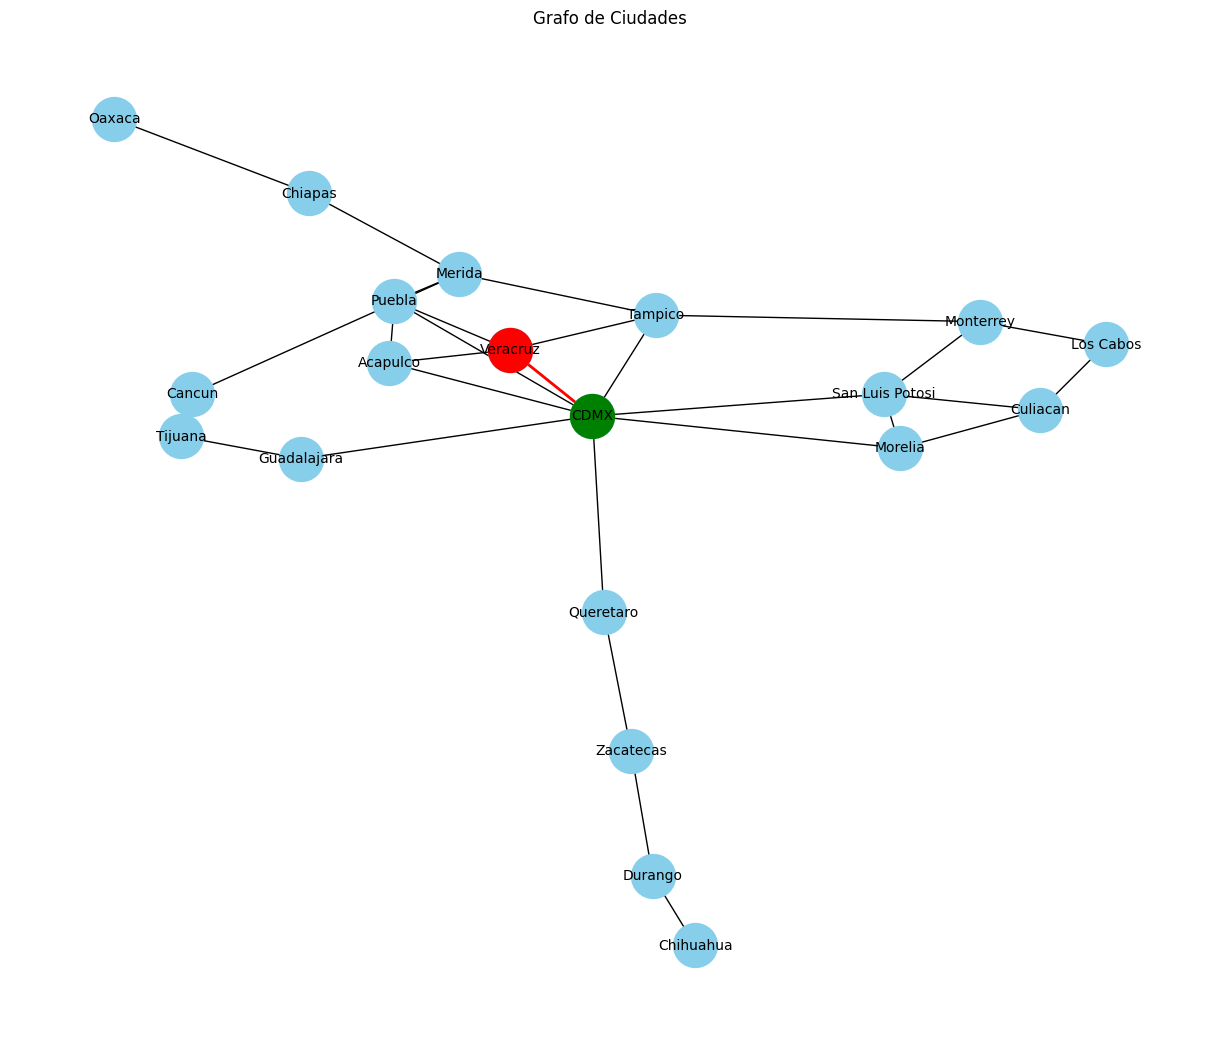

In [4]:
aStart("CDMX","Veracruz")

## GBFS

In [5]:
def GBFS(start_node,target_node):

    def heuristic(graph, current_node, target_node):
        # Heurística: calcular la distancia mínima desde el nodo actual al nodo objetivo
        return nx.shortest_path_length(graph, current_node, target_node, weight='weight')

    def gbfs_tsp(graph, start_node, target_node):
        # Inicialización
        frontier = [(heuristic(graph, start_node, target_node), start_node)]
        heapq.heapify(frontier)
        visited = set()

        while frontier:
            # Seleccionar el nodo de la frontera más cercano al nodo objetivo
            _, current_node = heapq.heappop(frontier)

            # Verificar si se ha llegado al nodo objetivo
            if current_node == target_node:
                return current_node

            # Expandir el nodo actual
            for neighbor in graph.neighbors(current_node):
                if neighbor not in visited:
                    heapq.heappush(frontier, (heuristic(graph, neighbor, target_node), neighbor))
            visited.add(current_node)

        return None  # Si no se encuentra una solución

    # Crear el grafo con los nodos y aristas
    GR = nx.Graph()
    GR.add_nodes_from(['Veracruz', 'Acapulco', 'Puebla', 'CDMX', 'Morelia', 'San Luis Potosi', 'Tampico', 'Culiacan', 'Los Cabos', 'Monterrey', 'Merida', 'Guadalajara', 'Tijuana', 'Cancun', 'Queretaro', 'Zacatecas', 'Oaxaca', 'Chiapas', 'Chihuahua', 'Durango'])

    # Agregar las aristas con sus pesos
    edges = [('Veracruz', 'Acapulco', 670), ('Veracruz', 'Puebla', 300), ('Veracruz', 'CDMX', 410),
            ('Veracruz', 'Tampico', 435), ('Acapulco', 'Puebla', 385), ('Acapulco', 'CDMX', 400),
            ('Puebla', 'CDMX', 130), ('CDMX', 'Morelia', 310), ('CDMX', 'San Luis Potosi', 411),
            ('CDMX', 'Tampico', 440), ('Morelia', 'San Luis Potosi', 330), ('Morelia', 'Culiacan', 970),
            ('San Luis Potosi', 'Culiacan', 935), ('San Luis Potosi', 'Monterrey', 510),
            ('Tampico', 'Monterrey', 510), ('Culiacan', 'Los Cabos', 626), ('Monterrey', 'Los Cabos', 1645),
            ('Puebla', 'Merida', 1380), ('Merida', 'Cancun', 300), ('Cancun', 'Tijuana', 3320),
            ('CDMX', 'Guadalajara', 540), ('Guadalajara', 'Tijuana', 1850), ('Tampico', 'Merida', 1420),
            ('CDMX', 'Queretaro', 210), ('Queretaro', 'Zacatecas', 280), ('Zacatecas', 'Durango', 260),
            ('Oaxaca', 'Chiapas', 360), ('Chiapas', 'Merida', 740), ('Chihuahua', 'Durango', 420)]

    GR.add_weighted_edges_from(edges)



    # Medir tiempo de ejecución
    start_time = time.process_time()

    # Calcular la ruta más corta utilizando GBFS
    end_node = gbfs_tsp(GR, start_node, target_node)
    shortest_path_length = nx.shortest_path_length(GR, start_node, end_node, weight='weight')
    shortest_path = nx.shortest_path(GR, start_node, end_node)

    # Calcular tiempo de ejecución
    execution_time = time.process_time() - start_time

    if end_node is not None:
        print("Longitud de la ruta más corta:", shortest_path_length)
        print("Camino recorrido:", shortest_path)
        print("Tiempo de ejecución:", execution_time, "segundos")
    else:
        print("No se encontró una ruta válida entre los nodos de inicio y objetivo.")

    # Visualización del grafo
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(GR)  # Posiciones de los nodos para el trazado
    nx.draw(GR, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10)  # Dibujar el grafo
    nx.draw_networkx_nodes(GR, pos, nodelist=[start_node], node_color='green', node_size=1000)  # Resaltar el nodo de inicio
    nx.draw_networkx_nodes(GR, pos, nodelist=[end_node], node_color='red', node_size=1000)  # Resaltar el nodo objetivo
    if end_node is not None:
        path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
        nx.draw_networkx_edges(GR, pos, edgelist=path_edges, width=2, edge_color='red')  # Resaltar el camino recorrido
    plt.title("Grafo de Ciudades")
    plt.show()


# Optimización de rutas


## Librerias y diseño del grafo

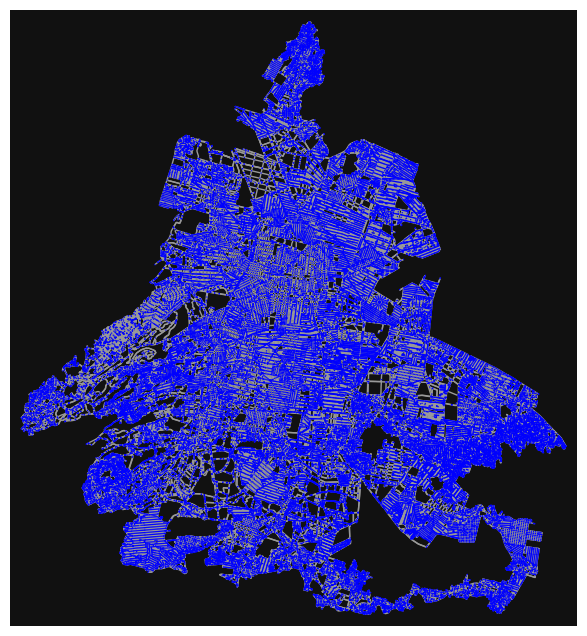

In [6]:
import osmnx as ox

import heapq
place_name = "CDMX, MEXICO"
G = ox.graph_from_place(place_name, network_type="drive")

ox.plot_graph(G,node_size=1,node_color="blue")
for edge in G.edges:
    # Cleaning the "maxspeed" attribute, some values are lists, some are strings, some are None
    maxspeed = 20
    if "maxspeed" in G.edges[edge]:
        maxspeed = G.edges[edge]["maxspeed"]
        if type(maxspeed) == list:
            speeds = [ int(speed) for speed in maxspeed ]
            maxspeed = min(speeds)
        elif type(maxspeed) == str:
            maxspeed = int(maxspeed)
    G.edges[edge]["maxspeed"] = maxspeed
    # agregando el peso de los nodos, haciendo conversion de distancia/tiempo
    G.edges[edge]["weight"] = G.edges[edge]["length"] / maxspeed

def style_unvisited_edge(edge): # funcion para el coloreo del plot sin haber sido visitado
    G.edges[edge]["color"] = "#014d8c"
    G.edges[edge]["alpha"] = 0.2
    G.edges[edge]["linewidth"] = 0.5

def style_visited_edge(edge): # color para nodos visitados
    G.edges[edge]["color"] = "#47018c"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def style_active_edge(edge): #color para nodo activo
    G.edges[edge]["color"] = '#e8a900'
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def style_path_edge(edge):
    G.edges[edge]["color"] = "white"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1
def plot_graph():
    ox.plot_graph(
        G,
        node_size =  [ G.nodes[node]["size"] for node in G.nodes ],
        edge_color = [ G.edges[edge]["color"] for edge in G.edges ],
        edge_alpha = [ G.edges[edge]["alpha"] for edge in G.edges ],
        edge_linewidth = [ G.edges[edge]["linewidth"] for edge in G.edges ],
        node_color = "white",
        bgcolor = "#000000"
    )



## Implementación A*

In [7]:
def O1(start, end):
    t1inicio=time.time()
    # Función para calcular la distancia euclidiana entre dos nodos
    def distance(node1, node2): # Se toma distancia euclidiana como euristica
        x1, y1 = G.nodes[node1]["x"], G.nodes[node1]["y"]
        x2, y2 = G.nodes[node2]["x"], G.nodes[node2]["y"]
        return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

    # Función que implementa el algoritmo A*
    def a_star(orig, dest, plot=False):
        # Inicializar nodos del grafo con valores predeterminados
        for node in G.nodes:
            G.nodes[node]["previous"] = None
            G.nodes[node]["size"] = 0
            G.nodes[node]["g_score"] = float("inf")
            G.nodes[node]["f_score"] = float("inf")

        # Colorear todas las aristas como no visitadas
        for edge in G.edges: # Ponemos color en cada uno de las aristas sin visitar
            style_unvisited_edge(edge)

        # Configurar tamaño de los nodos de inicio y fin
        G.nodes[orig]["size"] = 50
        G.nodes[dest]["size"] = 50

        # Inicializar puntajes de inicio
        G.nodes[orig]["g_score"] = 0
        G.nodes[orig]["f_score"] = distance(orig, dest)

        # Cola de prioridad para nodos a explorar
        pq = [(G.nodes[orig]["f_score"], orig)]
        step = 0

        # Bucle principal del algoritmo A*
        while pq:
            _, node = heapq.heappop(pq)
            # Verificar si se llegó al destino
            if node == dest:
                if plot:
                    print("Iteraciones:", step)
                    plot_graph()
                return

            # Explorar vecinos del nodo actual
            for edge in G.out_edges(node):
                style_visited_edge((edge[0], edge[1], 0))
                neighbor = edge[1]
                tentative_g_score = G.nodes[node]["g_score"] + distance(node, neighbor)

                # Actualizar puntajes si es un camino más corto
                if tentative_g_score < G.nodes[neighbor]["g_score"]:
                    G.nodes[neighbor]["previous"] = node
                    G.nodes[neighbor]["g_score"] = tentative_g_score
                    G.nodes[neighbor]["f_score"] = tentative_g_score + distance(neighbor, dest)
                    heapq.heappush(pq, (G.nodes[neighbor]["f_score"], neighbor))

                    # Marcar aristas activas
                    for edge2 in G.out_edges(neighbor):
                        style_active_edge((edge2[0], edge2[1], 0))
            step += 1

    # Función para reconstruir el camino óptimo
    def reconstruct_path(orig, dest, plot=False, algorithm=None):
        # Restaurar colores de todas las aristas
        for edge in G.edges:
            style_unvisited_edge(edge)

        # Variables para calcular la distancia y velocidad promedio
        dist = 0
        speeds = []
        curr = dest

        # Reconstruir el camino desde el destino hasta el origen
        while curr != orig:
            prev = G.nodes[curr]["previous"]
            dist += G.edges[(prev, curr, 0)]["length"]
            speeds.append(G.edges[(prev, curr, 0)]["maxspeed"])
            style_path_edge((prev, curr, 0))

            # Contabilizar el uso del algoritmo si es especificado
            if algorithm:
                G.edges[(prev, curr, 0)][f"{algorithm}_uses"] = G.edges[(prev, curr, 0)].get(f"{algorithm}_uses", 0) + 1

            curr = prev

        # Calcular la distancia en kilómetros y mostrar información si se solicita
        dist /= 1000
        if plot:
            print(f"Distance: {dist}")
            print(f"Avg. speed: {sum(speeds) / len(speeds)}")
            print(f"Total time: {dist / (sum(speeds) / len(speeds)) * 60}")
            plot_graph()

    # Llamar a las funciones para ejecutar el algoritmo A* y reconstruir el camino
    a_star(start, end, plot=True)
    reconstruct_path(start, end, plot=True)
    print("Tiempo total de ejecución: ", time.time()-t1inicio)


## Implementación BEAM SEARCH

In [8]:
def O2(start,end):
    tinicio=time.time()
    # BEAM SEARCH
    # Función para calcular la distancia euclidiana entre dos nodos
    def distance(node1, node2): # Se toma distancia euclidiana como euristica
        x1, y1 = G.nodes[node1]["x"], G.nodes[node1]["y"]
        x2, y2 = G.nodes[node2]["x"], G.nodes[node2]["y"]
        return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

    def beam_search(orig, dest, beam_width=65, plot=False):
        # Configura los valores iniciales para cada nodo en el grafo
        for node in G.nodes:
            G.nodes[node]["previous"] = None  # Nodo previo en el camino
            G.nodes[node]["size"] = 0  # Tamaño del nodo (para visualización)
            G.nodes[node]["g_score"] = float("inf")  # Costo actual del camino desde el nodo de inicio a este nodo
            G.nodes[node]["f_score"] = float("inf")  # Estimación del costo total desde el nodo de inicio hasta el destino a través de este nodo

        # Marca todas las aristas como no visitadas
        for edge in G.edges:
            style_unvisited_edge(edge)

        # Configura el tamaño de los nodos de inicio y destino para visualización
        G.nodes[orig]["size"] = 50
        G.nodes[dest]["size"] = 50

        # Configura el puntaje g y f para el nodo de inicio
        G.nodes[orig]["g_score"] = 0  # El costo de llegar al nodo de inicio desde el nodo de inicio es 0
        G.nodes[orig]["f_score"] = distance(orig, dest)  # Estimación del costo total desde el nodo de inicio hasta el destino

        # Inicializa la cola de prioridad con el nodo de inicio y su f_score
        pq = [(G.nodes[orig]["f_score"], orig)]

        step = 0  # Contador de iteraciones del algoritmo

        # Comienza el bucle principal del algoritmo Beam Search
        while pq:
            new_pq = []  # Nueva cola de prioridad para la próxima iteración
            # Expande los nodos en la cola de prioridad actual
            for _ in range(beam_width):
                # Si no hay más nodos en la cola de prioridad, sal del bucle
                if not pq:
                    break
                # Extrae el nodo con el f_score mínimo de la cola de prioridad
                _, node = heapq.heappop(pq)
                # Si llegamos al destino, terminamos la búsqueda
                if node == dest:
                    # Si se especifica, imprime el número de iteraciones y muestra el gráfico del camino
                    if plot:
                        print("Iteraciones:", step)
                        plot_graph()
                    return
                # Explora los nodos vecinos del nodo actual
                for edge in G.out_edges(node):
                    style_visited_edge((edge[0], edge[1], 0))
                    neighbor = edge[1]
                    # Calcula el nuevo g_score para el vecino
                    tentative_g_score = G.nodes[node]["g_score"] + distance(node, neighbor)
                    # Si el nuevo g_score es mejor que el anterior para este vecino
                    if tentative_g_score < G.nodes[neighbor]["g_score"]:
                        # Actualiza el nodo previo y los puntajes g y f del vecino
                        G.nodes[neighbor]["previous"] = node
                        G.nodes[neighbor]["g_score"] = tentative_g_score
                        G.nodes[neighbor]["f_score"] = tentative_g_score + distance(neighbor, dest)
                        # Agrega el vecino a la nueva cola de prioridad
                        heapq.heappush(new_pq, (G.nodes[neighbor]["f_score"], neighbor))
                        # Marca las aristas del vecino como activas
                        for edge2 in G.out_edges(neighbor):
                            style_active_edge((edge2[0], edge2[1], 0))
            # Actualiza la cola de prioridad con la nueva cola para la próxima iteración
            pq = new_pq
            # Incrementa el contador de iteraciones
            step += 1
    def reconstruct_path(orig, dest, plot=False, algorithm=None):
        for edge in G.edges:
            style_unvisited_edge(edge)
        dist = 0
        speeds = []
        curr = dest
        while curr != orig:
            prev = G.nodes[curr]["previous"]
            dist += G.edges[(prev, curr, 0)]["length"]
            speeds.append(G.edges[(prev, curr, 0)]["maxspeed"])
            style_path_edge((prev, curr, 0))
            if algorithm:
                G.edges[(prev, curr, 0)][f"{algorithm}_uses"] = G.edges[(prev, curr, 0)].get(f"{algorithm}_uses", 0) + 1
            curr = prev
        dist /= 1000
        if plot:
            print(f"Distance: {dist}")
            print(f"Avg. speed: {sum(speeds)/len(speeds)}")
            print(f"Total time: {dist/(sum(speeds)/len(speeds)) * 60}")
            plot_graph()

    beam_search(start, end, plot=True)
    reconstruct_path(start, end, plot=True)
    print("Tiempo total de ejecución: ",time.time()-tinicio)


# Ejecución Algoritmos

Seleccione el problema a resolver:
(1) Problema del Viajero	(2) Optimización de rutas
2
Seleccione el algoritmo con el que desea que se resuelva o ambos:
	(1) A*	(2) BEAM SEARCH	(3) Ambos
3
Solución con A*
Iteraciones: 6699


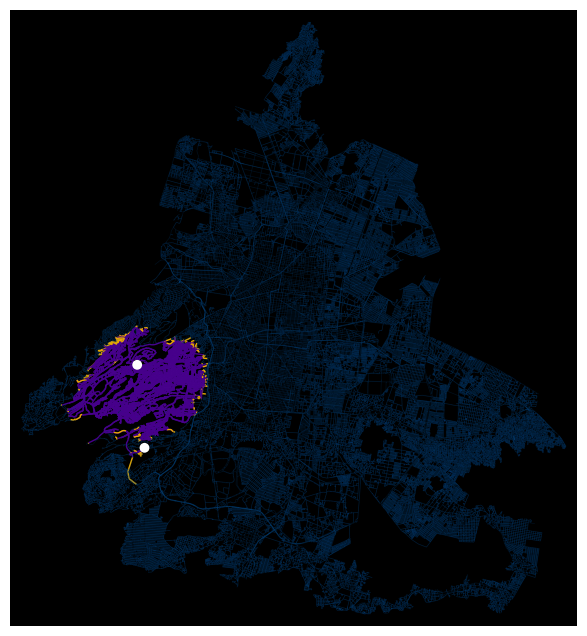

Distance: 11.749035000000005
Avg. speed: 20.125
Total time: 35.028178881987586


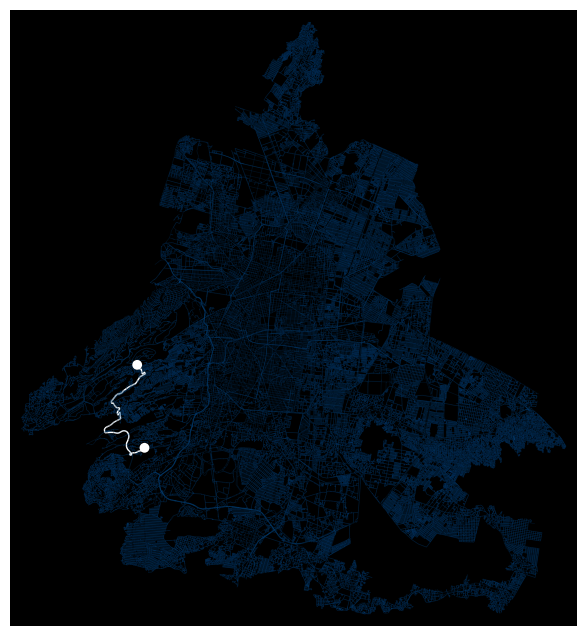

Tiempo total de ejecución:  61.80037832260132
Solución con BEAM SEARCH
Iteraciones: 216


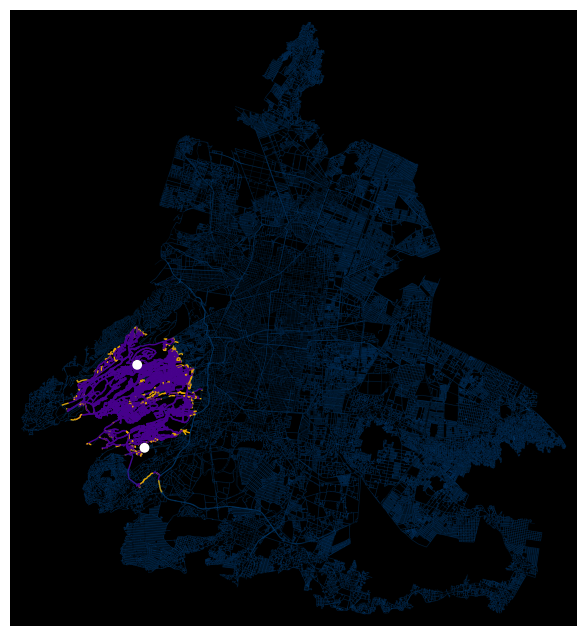

Distance: 16.61173200000001
Avg. speed: 20.440528634361232
Total time: 48.76116160344831


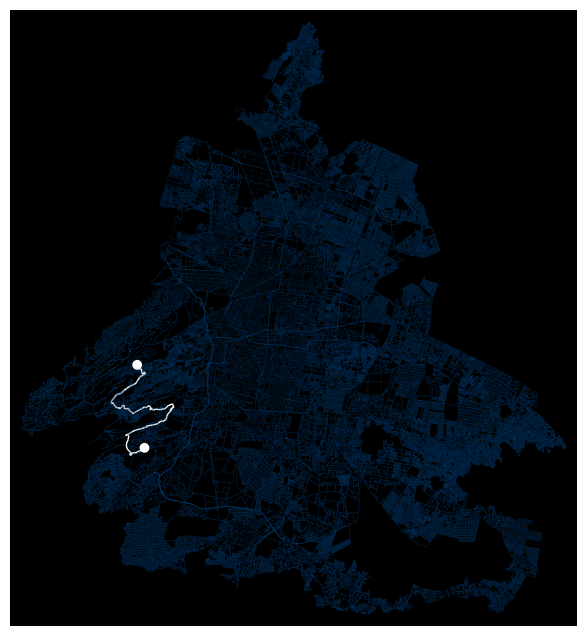

Tiempo total de ejecución:  57.92611265182495


In [9]:
# Crear el grafo con los nodos y aristas
import random
GR = nx.Graph()
GR.add_nodes_from(['Veracruz', 'Acapulco', 'Puebla', 'CDMX', 'Morelia', 'San Luis Potosi', 'Tampico', 'Culiacan', 'Los Cabos', 'Monterrey', 'Merida', 'Guadalajara', 'Tijuana', 'Cancun', 'Queretaro', 'Zacatecas', 'Oaxaca', 'Chiapas', 'Chihuahua', 'Durango'])


def menu():
    while True:
        a = input("Seleccione el problema a resolver:\n(1) Problema del Viajero\t(2) Optimización de rutas\n")
        if a.isdigit():
            a = int(a)
            if a == 1:
                b = int(input("Ingrese el algoritmo con el que desea resolver el problema:\n(1) A*\t(2) GBFS\t(3) Ambos algoritmos\n"))
                start_node = input("Ingrese el nodo de inicio: ")
                target_node = input("Ingrese el nodo de llegada: ")
                # Verificar si los nodos ingresados están en la lista de nodos
                if start_node in GR.nodes and target_node in GR.nodes:
                    if b == 1:
                        aStart(start_node,target_node)
                    elif b == 2:
                        GBFS(start_node,target_node)
                    elif b == 3:
                        print("Implementacion A*")
                        aStart(start_node,target_node)
                        print("Implementacion GBFS")
                        GBFS(start_node,target_node)
                    else:
                        print("Opción de algoritmo inválida.")
                    break
                else:
                    print("Uno o ambos nodos ingresados no están en la lista de nodos.")
            elif a == 2:
                # Resolver Optimización de rutas
                solve_optimization()
                break
            else:
                print("Por favor, seleccione una opción válida.")
        else:
            print("Por favor, ingrese un número válido.")


def solve_optimization():
    # Seleccionar nodos aleatorios como inicio y fin
    start = random.choice(list(G.nodes))
    end = random.choice(list(G.nodes))

    while True:
        b = input("Seleccione el algoritmo con el que desea que se resuelva o ambos:\n\t(1) A*\t(2) BEAM SEARCH\t(3) Ambos\n")
        if b.isdigit():
            b = int(b)
            if b == 1:
                print("Solución con A*")
                O1(start, end)
                break
            elif b == 2:
                print("Solución con BEAM SEARCH")
                O2(start, end)
                break
            elif b == 3:
                print("Solución con A*")
                O1(start, end)
                print("Solución con BEAM SEARCH")
                O2(start, end)
                break
            else:
                print("Por favor, seleccione una opción válida.")
        else:
            print("Por favor, ingrese un número válido.")

# Llamar a la función del menú
menu()
